In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [171]:
df= pd.read_excel('flight_price.xlsx')

In [172]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [173]:
df.shape

(10683, 11)

In [174]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [176]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [177]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [178]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<AxesSubplot:xlabel='Price'>

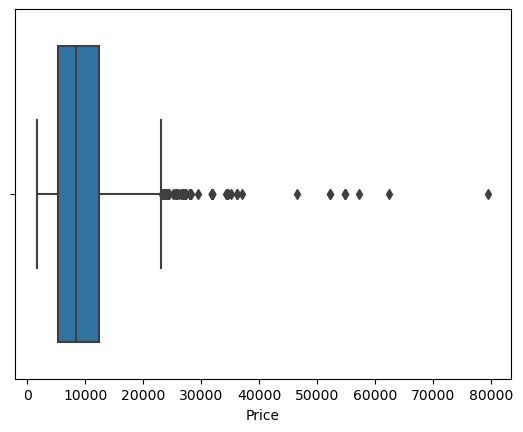

In [179]:
sns.boxplot(df['Price'])

In [180]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [181]:
mode  = df['Route'].mode()[0]

In [182]:
mode

'DEL → BOM → COK'

In [183]:
df['Mode_route'] = df['Route'].fillna(mode)

In [184]:
df[['Mode_route']].isnull().sum()

Mode_route    0
dtype: int64

In [185]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [186]:
mode = df['Total_Stops'].mode()[0]

In [187]:
mode

'1 stop'

In [188]:
df['Mode_Total_Stops'] = df['Total_Stops'].fillna(mode)

In [189]:
df[['Mode_Total_Stops']].isnull().sum()

Mode_Total_Stops    0
dtype: int64

In [190]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [191]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Mode_route,Mode_Total_Stops,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR → DEL,non-stop,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,2 stops,1,05,2019


In [192]:
df['Date'] = df['Date'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [193]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Mode_route,Mode_Total_Stops,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR → DEL,non-stop,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,2 stops,1,5,2019


In [194]:
df.drop('Date_of_Journey',axis=1,inplace = True)

In [195]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Mode_route,Mode_Total_Stops,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR → DEL,non-stop,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,2 stops,1,5,2019


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Arrival_Time      10683 non-null  object
 6   Duration          10683 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10683 non-null  object
 9   Price             10683 non-null  int64 
 10  Mode_route        10683 non-null  object
 11  Mode_Total_Stops  10683 non-null  object
 12  Date              10683 non-null  int32 
 13  Month             10683 non-null  int32 
 14  Year              10683 non-null  int32 
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [197]:
df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [198]:
df['Arrival_Hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

In [199]:
df['Arrival_Minutes'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [200]:
df['Arrival_Hours']

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Hours, Length: 10683, dtype: object

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Arrival_Time      10683 non-null  object
 6   Duration          10683 non-null  object
 7   Total_Stops       10682 non-null  object
 8   Additional_Info   10683 non-null  object
 9   Price             10683 non-null  int64 
 10  Mode_route        10683 non-null  object
 11  Mode_Total_Stops  10683 non-null  object
 12  Date              10683 non-null  int32 
 13  Month             10683 non-null  int32 
 14  Year              10683 non-null  int32 
 15  Arrival_Hours     10683 non-null  object
 16  Arrival_Minutes   10683 non-null  object
dtypes: int32(3),

In [202]:
df.drop('Arrival_Time', axis = 1 , inplace= True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   Mode_route        10683 non-null  object
 10  Mode_Total_Stops  10683 non-null  object
 11  Date              10683 non-null  int32 
 12  Month             10683 non-null  int32 
 13  Year              10683 non-null  int32 
 14  Arrival_Hours     10683 non-null  object
 15  Arrival_Minutes   10683 non-null  object
dtypes: int32(3), int64(1), object(12)
memory usage: 1.2+ MB


In [204]:
df['Arrival_Hours'] = df['Arrival_Hours'].astype(int)
df['Arrival_Minutes'] = df['Arrival_Minutes'].astype(int)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Dep_Time          10683 non-null  object
 5   Duration          10683 non-null  object
 6   Total_Stops       10682 non-null  object
 7   Additional_Info   10683 non-null  object
 8   Price             10683 non-null  int64 
 9   Mode_route        10683 non-null  object
 10  Mode_Total_Stops  10683 non-null  object
 11  Date              10683 non-null  int32 
 12  Month             10683 non-null  int32 
 13  Year              10683 non-null  int32 
 14  Arrival_Hours     10683 non-null  int32 
 15  Arrival_Minutes   10683 non-null  int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [206]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Mode_route,Mode_Total_Stops,Date,Month,Year,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,BLR → DEL,non-stop,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,CCU → IXR → BBI → BLR,2 stops,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,DEL → LKO → BOM → COK,2 stops,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,CCU → NAG → BLR,1 stop,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,BLR → NAG → DEL,1 stop,1,3,2019,21,35


In [207]:
df['Dept_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_Min'] = df['Dep_Time'].str.split(':').str[1]
df['Dept_Hour'] = df['Dept_Hour'].astype(int)
df['Dept_Min'] = df['Dept_Min'].astype(int)
df.drop('Dep_Time', axis= 1, inplace = True)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10683 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10683 non-null  object
 7   Price             10683 non-null  int64 
 8   Mode_route        10683 non-null  object
 9   Mode_Total_Stops  10683 non-null  object
 10  Date              10683 non-null  int32 
 11  Month             10683 non-null  int32 
 12  Year              10683 non-null  int32 
 13  Arrival_Hours     10683 non-null  int32 
 14  Arrival_Minutes   10683 non-null  int32 
 15  Dept_Hour         10683 non-null  int32 
 16  Dept_Min          10683 non-null  int32 
dtypes: int32(7),

In [209]:
df.drop('Route', axis = 1, inplace  = True)
df.drop('Mode_route', axis = 1, inplace  = True)

In [210]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Mode_Total_Stops,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,non-stop,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2 stops,1,5,2019,13,15,5,50


In [211]:
df['Dur_hr'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Dur_min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [212]:
df['Dur_hr']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Dur_hr, Length: 10683, dtype: object

In [213]:
df['Dur_min']

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Dur_min, Length: 10683, dtype: object

In [214]:
df['Dur_hr'] = df['Dur_hr'].astype(int)
df['Dur_min'] = df['Dur_min'].astype(int)
df.drop('Duration', axis= 1, inplace = True)

ValueError: invalid literal for int() with base 10: '5m'

In [215]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [216]:
import numpy as np

In [217]:
df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Mode_Total_Stops,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hour,Dept_Min,Dur_hr,Dur_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,non-stop,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,2 stops,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,2 stops,9,6,2019,4,25,9,25,19,NaN


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Source            10683 non-null  object
 2   Destination       10683 non-null  object
 3   Duration          10683 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10683 non-null  object
 6   Price             10683 non-null  int64 
 7   Mode_Total_Stops  10683 non-null  object
 8   Date              10683 non-null  int32 
 9   Month             10683 non-null  int32 
 10  Year              10683 non-null  int32 
 11  Arrival_Hours     10683 non-null  int32 
 12  Arrival_Minutes   10683 non-null  int32 
 13  Dept_Hour         10683 non-null  int32 
 14  Dept_Min          10683 non-null  int32 
 15  Dur_hr            10683 non-null  object
 16  Dur_min           9651 non-null   object
dtypes: int32(7),

In [219]:
df['Total_Stops'] =df['Total_Stops'].map({'non-stop':0, '1 stop':1,'2 stops':2, '3 stops':3, '4 stops': 4 , np.nan:1})

In [220]:
df['Total_Stops'].isnull().sum()

0

In [221]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [222]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [223]:
from sklearn.preprocessing import OneHotEncoder

In [224]:
encoder = OneHotEncoder()

In [230]:
encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [233]:
df1 = pd.DataFrame(encoder.fit_transform(df[['Airline', 'Source', 'Destination']]).toarray(), columns = encoder.get_feature_names_out())

In [234]:
pd.concat([df1, df])

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Mode_Total_Stops,Date,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hour,Dept_Min,Dur_hr,Dur_min
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,non-stop,9.0,4.0,2019.0,22.0,25.0,19.0,55.0,2,30
10679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,non-stop,27.0,4.0,2019.0,23.0,20.0,20.0,45.0,2,35
10680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,non-stop,27.0,4.0,2019.0,11.0,20.0,8.0,20.0,3,NaN
10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,non-stop,1.0,3.0,2019.0,14.0,10.0,11.0,30.0,2,40


In [236]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air Asia                           10683 non-null  float64
 1   Airline_Air India                          10683 non-null  float64
 2   Airline_GoAir                              10683 non-null  float64
 3   Airline_IndiGo                             10683 non-null  float64
 4   Airline_Jet Airways                        10683 non-null  float64
 5   Airline_Jet Airways Business               10683 non-null  float64
 6   Airline_Multiple carriers                  10683 non-null  float64
 7   Airline_Multiple carriers Premium economy  10683 non-null  float64
 8   Airline_SpiceJet                           10683 non-null  float64
 9   Airline_Trujet                             10683 non-null  float64
 10  Airline_Vistara       

In [239]:
df1

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
